In [27]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")
import torch
from matplotlib.pyplot import figure
from datasets import DatasetUnsupervisedMafaulda

figure(figsize=(8, 6), dpi=80)

limiter = 2000

ABS_PATH = '/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset'

test_dataset = DatasetUnsupervisedMafaulda(data_normal=f'{ABS_PATH}/dataset_free/X_test_normal.h5',
                                           data_failure=f'{ABS_PATH}/dataset_free/X_test_failure.h5',
                                           context=400)

test_loader = torch.utils.data.DataLoader(
                test_dataset, batch_size=1, shuffle=False
                )

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499597/499597 [00:00<00:00, 1338072.51it/s]


<Figure size 640x480 with 0 Axes>

In [28]:
def union_vector(data_predict:dict):
    
    x_concat = data_predict['begin']
    
    del data_predict['begin']
    
    keys_predicted = list(data_predict.keys())
    
    for key in keys_predicted:
        x_concat = torch.concat((x_concat, data_predict[key]), dim=1)
        
        del data_predict[key]
    
    return x_concat

In [29]:
data_predict = torch.load(f"{ABS_PATH}/predicted_view_plot.pt")

data_predict['begin'].shape

torch.Size([1, 400, 8])

In [30]:
vet_predict = union_vector(data_predict)

torch.Size([1, 1400, 8])

In [50]:
vet_predict.shape

torch.Size([1, 1400, 8])

## Concat Vets

In [49]:
x_true, _ = test_loader.dataset[0]

get_n_elements = 5

for i in range(1, get_n_elements):
    
    x_second, _ = test_loader.dataset[i]
    
    x_true = torch.concat((x_true, x_second), dim=0)
    
x_true.shape

torch.Size([2000, 8])

### First channel

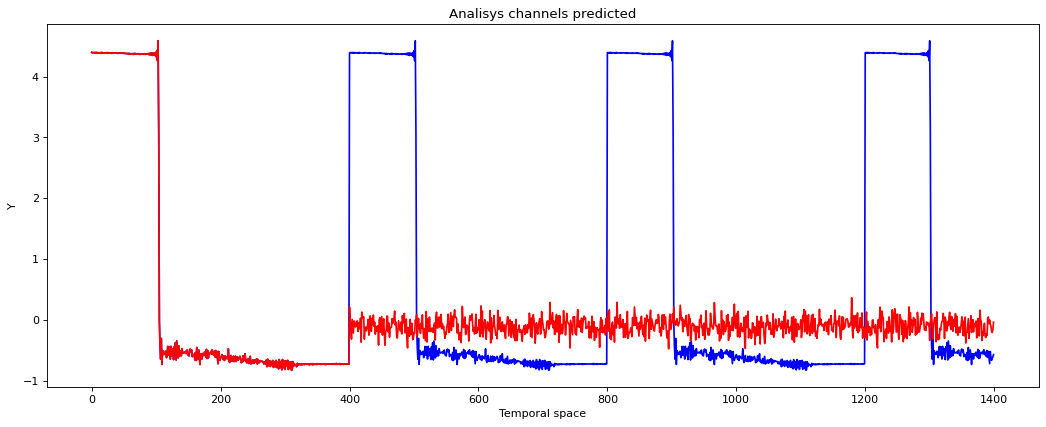

In [86]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)

limiter = 1400

#plt.plot(data_normal_train[:limiter,0])

#fig, axs = plt.subplots(1, 2, figsize=(15, 15))

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
plt.plot(x_true[:limiter, feature_channel], color='blue', label='sinal Real')
plt.plot(vet_predict[0][:limiter, feature_channel], color='r', label='sinal previsto')
